# Projet numérique : câble sous marin - Pierre DENIG & Théo COMMUNAL


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

# __Partie I - théorie__



## __Réponse 1__

D'après la loi des grands nombre, si $(X_n)_{n \in \mathbb{N}}$ est une suite de variables aléatoires indépendantes, de même loi et intégrables alors $\left (M_n =\frac{1}{n}\sum_{i=0}^n X_i \right ) \xrightarrow[n \rightarrow \infty]{} E(X_1)$ presque sûrement et en moyenne.

## __Réponse 2__

On a $Z = (Z(x_0), ... ,Z(x_n))$. On suppose que l'on connaisse $n-k+1 \in [|1,n-1|]$ composantes de $Z$. On peut supposer sans perdre de généralité que l'on connait $Y = (Z(x_{k}, ... ,Z(x_n))$. Posons $X = (Z(x_0), ... ,Z(x_{k-1}))$. Alors on a 
$$f_{X|Y=y}(x) = \frac{1}{(2\pi)^{k/2}\sqrt{det(CS_X)}}e^{-\frac{1}{2}(x-\psi(y))^t CS_X^{-1}(x - \psi(y))}$$

où $CS_X = Cov(X,X) - Cov(X,Y)Cov(Y,Y)^{-1}Cov(Y,X)$ et $\psi(y) = E(X) + Cov(X,Y)Cov(Y,Y)^{-1}(y-E(Y))$

## __Réponse 3__

Soit ${Y} = (Y_1,...,Y_p)$ un vecteur de composantes gaussiennes centrées réduites indépendantes. Soit $m\in \mathbb{R}^p$ et $R \in \mathbb{M}_p(\mathbb{R})$. Posons $\textbf{Z} = m +R\textbf{Y}$.

On a $\Phi_Z(u) = E(e^{i \langle u|\textbf{Z} \rangle}) = E(e^{i \langle u |m + R\textbf{Y} \rangle}) = e^{i \langle u | m \rangle}E(e^{i \langle u | R\textbf{Y} \rangle}) = e^{i \langle u | m \rangle}E(e^{i \langle R^t u | \textbf{Y} \rangle}) = e^{i \langle u | m \rangle}\Phi_Y(R^tu)$.

Or $Y$ est un vecteur avec $E(Y) = (0,...,0)$ et $Var(Y) = I_p$. Donc $\Phi_Y(u) = e^{-\frac{u^2}{2}\|u\|}$.

Ainsi $\Phi_Z(u) = e^{i \langle u | m \rangle - \frac{u^2}{2}\langle u | RR^t u \rangle}$.

Donc comme la fonction caractéristique détermine la loi, $Z$ est un vecteur gaussien de moyenne $m$ et de matrice de covariance $RR^t$.

## __Réponse 4__

Il suffit dans ce cas d'appliquer l'algorithme de Box-Muller à $X$ (cf q2).


## __Partie I - préambule__

In [113]:
#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12
#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


# __Partie I - numérique__

## __Question 1__

In [6]:
#Fonction C
def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


## __Question 2__

In [7]:
distmat=abs(np.subtract.outer(discretization,discretization))

## __Question 3__

In [8]:
Sigma=Covexp(distmat,a,sigma2)

## __Question 4__

In [9]:
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]


## __Question 5__

In [114]:
invSigma = np.linalg.inv(SigmaObs)
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

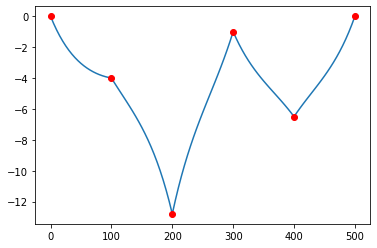

In [11]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()


## __Question 6__

In [12]:
 SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))


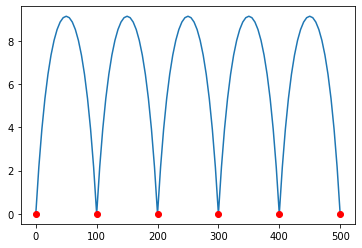

In [13]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

## __Question 7__

In [14]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)


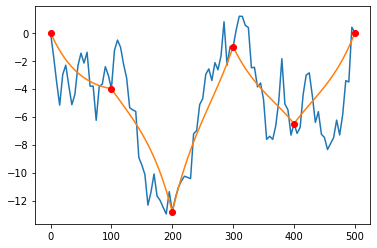

In [15]:
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()


## __Question 8__

In [16]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))


## __Question 9__

In [45]:
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)
sum(result)/K
length(allval1,Delta)


501.6468416918411

## __Question 10__

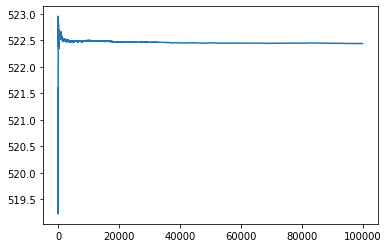

In [18]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

## __Question 11__

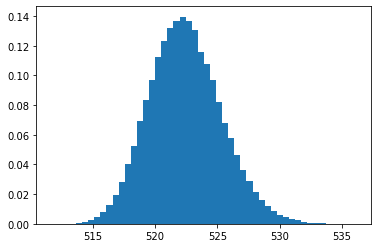

In [19]:
plt.hist(result,50,density=True)
plt.show()


## __Question 12__

In [20]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.761493845683, 528.1208174773059]

In [21]:
np.quantile(result,[0.025,0.975])


array([517.12168127, 528.46117882])

## __Question 13__

In [22]:
np.mean(result>525)


0.18511

# __Partie II - Valeurs positives__

## __Quetion 1__

In [23]:
def isNeg(t):
    i = 0
    n = len(t)
    while i < n and t[i] < 0:
        i += 1
    return (i == n)    
    


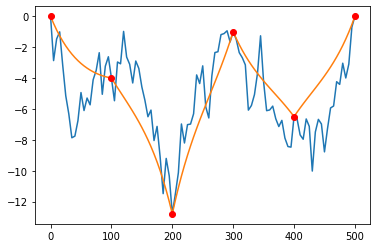

In [25]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

while not(isNeg(simu)):
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    
allval4 = np.zeros(N)
allval4[unknown_indexes]=simu
allval4[observation_indexes]=depth
plt.plot(discretization,allval4)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()



## __Question 2__

In [46]:
K = 100000 #Nombre simulations
D = np.zeros(K)
rejet = 0
for i in range(K):
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    b = isNeg(simu)
    if not(b):
        rejet += 1
    while not(b):
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
        b = isNeg(simu)
    
    allval5 = np.zeros(N)
    allval5[unknown_indexes]=simu
    allval5[observation_indexes]=depth
    D[i] = length(allval5,Delta)

sigman = np.std(D)
E = sum(D)/K
sig = np.sqrt(np.var(D))


Longueur moyenne : 
521.7903212404672

Ecart type : 
2.824267837915522

Interval de confiance : 
[516.61272924 527.69100422]

Taux de rejet : 
0.96156

P(L) > 525 m :
0.18525

Histograme : 


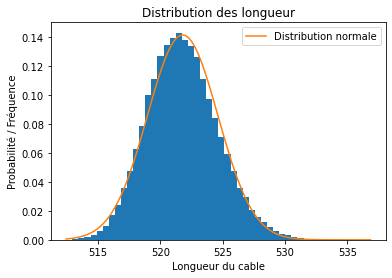

In [53]:
print("Longueur moyenne : ")
print(E)
print()
print("Ecart type : ")
print(sig)
print()
print("Interval de confiance : ")
print(np.quantile(D,[0.025,0.975]))
print()
print("Taux de rejet : ")
print(rejet/K)
print()
print("P(L) > 525 m :")
print(np.mean(result>525))
print()
x = np.linspace(np.min(D),np.max(D),100)
y = (1/(np.sqrt(2*np.pi)*sig))*np.exp(-(x-E)**2/(2*sig**2))
print("Histograme : ")
plt.hist(D,50,density=True)
plt.plot(x,y, label = "Distribution normale")
plt.xlabel("Longueur du cable")
plt.ylabel("Probabilité / Fréquence")
plt.title("Distribution des longueur")
plt.legend()
plt.show()

On remarque tout d'abord qu'avec cette méthode la longueur moyenne obtenue est plus élevée que précédemment (de 501 à 522). Cela vient du fait qu'on impose au fond marin d'être à une hauteur strictement négatif. 

L'histogramme de la distribution des longueurs obtenues s'apparente toujours à une distribution normale. 

Notre intervalle de confiance passe de $[517.12, 528.46]$ à $[516.61,527.69]$ et la probabilité d'obtenir une longueur supérieure à 525m est quasi inchangée.

Afin d'avoir une meilleure précision nous avons considéré $100000$ simulations et obtenons un taux de rejet $\alpha = 0.962$.

# __Partie II - Approche bayésienne - Questions théoriques__

## __Question 3__


On pose $Z = (Z_{OBS},Z_{UKN})$. On note $C_{OBS}$ (resp. $C_{UKN}) = $Var(Z_{OBS})$ (resp. $Var(Z_{UKN})).

On suppose $\mu \hookrightarrow N(m_{\mu}, \sigma_{\mu}^2)$. 

On a $f_{Z_{OBS} | \mu = \mu^*}(z) = \frac{1}{(2\pi)^3\sqrt{det(C_{OBS})}}e^{-\frac{1}{2}(z - \mu^*1)^t C_{OBS}^{-1}(z - \mu^*1)}$.

De plus $f_{\mu}(\mu^*) = \frac{1}{\sqrt{2\pi}\sigma_{\mu}}e^{-\frac{(\mu^* - m_{\mu})^2}{2\sigma_{\mu}^2}}$.

Or $f_{Z_{OBS} | \mu = \mu^*}(z) = \frac{f_{(Z_{OBS},\mu)}(z,\mu^*)}{f_{\mu}(\mu^*)}$ d'où :

$$f_{(Z_{OBS},\mu)}(z,\mu^*) = \frac{1}{(2\pi)^{\frac{7}{2}}\sqrt{det(C_{OBS})\sigma_{\mu}^2}}e^{-\frac{(\mu^* - m_{\mu})^2}{2\sigma_{\mu}^2} -\frac{1}{2}(z-\mu^*1)^tC_{OBS}^{-1}(z-\mu^*1)}$$

Or, $$ \frac{(\mu^* - m_{\mu})^2}{2\sigma_{\mu}^2} + \frac{1}{2}(z-\mu^*1)^tC_{OBS}^{-1}(z-\mu^*1)$$ $$= {\mu^{*}}^2(1^tC_{OBS}^{-1}1 +\frac{1}{\sigma_{\mu}^2}) - \mu^*(1^tC_{OBS}z + z^tC_{OBS}1 - \frac{2m_{\mu}}{\sigma_{\mu}^2}) + z^tC_{OBS}^{-1}z + \frac{m_{\mu}^2}{\sigma_{\mu}^2}$$ $$=\frac{(\mu^* - \hat{\mu}(z))^2}{\hat{\sigma}^2}$$

avec $\hat{\sigma}^2 = (1^tC_{OBS}^{-1}1+\frac{1}{\sigma_{\mu}^2})^{-1}$ et $\hat{\mu}(z) = \hat{\sigma}^2(1^tC_{OBS}^{-1}z - \frac{m_{\mu}}{\sigma_{\mu}^2})$.

D'où $ f_{(Z_{OBS},\mu)}(z,\mu^*) = \frac{1}{(2\pi)^{\frac{7}{2}}\sqrt{det(C_{OBS})\sigma_{\mu}^2}}e^{-\frac{(\mu^* - \hat{\mu}(z))^2}{2\hat{\sigma}^2}}$

On pose $\hat{\mu} = \hat{\mu}(z_{OBS})$.
De même on a $f_{\mu | Z_{OBS} = z_{OBS}}(\mu^*) = \frac{f_{(Z_{OBS},\mu)}(z_{OBS},\mu^*)}{f_{Z_{OBS}}(z_{OBS})} = \frac{1}{\sqrt{2\pi}\hat{\sigma}}e^{-\frac{(\mu^* - \hat{\mu})^2}{2\hat{\sigma}^2}}$.

Donc $\mu | Z_{OBS} = z_{OBS} \hookrightarrow N(\hat{\mu},\hat{\sigma}^2)$.

## __Question 4__

Soient $X$,$Y$ et $Z$ trois vecteurs à densité.

On a $f_{X,Y|Z=z}(x,y) = \frac{f_{X,Y,Z}(x,y,z)}{f_Z(z)}$. Or $f_{X|Y=y,Z=z}(x) = \frac{f_{X,Y,Z}(x,y,z)}{f_{Y,Z}(y,z)}$.
De plus, $f_{Y|Z=z}(y) = \frac{f_{Y,Z}(y,z)}{f_Z(z)}$. D'où, $f_{X|Y=y,Z=z}(x)f_{Y|Z=z}(y) = \frac{f_{X,Y,Z}(x,y,z)}{f_Z(z)}$.

Donc $f_{X,Y|Z=z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=z}(y)$.

## __Question 5__

D'après ce qui précède on a directement, en prenant $(X,Y,Z) = (Z_{UKN},\mu,Z_{OBS})$,  $f_{Z_{UNK},\mu|Z_{OBS} = z_{OBS}}(z,\mu^*) = f_{Z_{UNK}|\mu = \mu^*,Z_{OBS} = z_{OBS}}(z)f_{u|Z_{OBS} = z_{OBS}}(\mu^*)$.

Donc $f_{Z_{UNK},\mu|Z_{OBS} = z_{OBS}}(z,\mu^*) = \frac{1}{(2\pi)^{(k+1)/2}\sqrt{det(CS_{Z_{UNK}})\hat{\sigma}^2}}e^{-\frac{1}{2}(z-\psi(z_{OBS}))^t CS_{Z_{UNK}}^{-1}(z - \psi(z_{OBS}))-\frac{(\mu^* - \hat{\mu})^2}{2\hat{\sigma}^2}}$.

avec $\psi(z_{OBS}) = E(Z_{UNK}) + C_{UNK,OBS}C_{OBS}^{-1}(z_{OBS}-E(Z_{UNK}))$ et $CS_{Z_{UNK}} = C_{UNK} - C_{UNK,OBS}C_{OBS}^{-1}C_{OBS,UNK}$.

# __Partie II - Approche bayésienne - Simulation__

## __Question 6__ 

In [79]:
m_mu = -4
sig_mu = 2
un = np.array([1,1,1,1,1,1])

sigmaChapCarré = 1/(np.dot(un.T,np.dot(np.linalg.inv(SigmaObs),un)) + 1/sig_mu**2)
muChap = sigmaChapCarré*(np.dot(un.T,np.dot(np.linalg.inv(SigmaObs),depth.T)) +m_mu/sig_mu**2)[0]
sigmaChap = np.sqrt(sigmaChapCarré)
print("Sigma chapeau carré : " + str(sigmaChapCarré))
print("Mu chapeau : " + str(muChap))


Sigma chapeau carré : 1.5368909974762894
Mu chapeau : -3.9071275815647


## __Question 7__

On a  $\mu | Z_{OBS} = z_{OBS} \hookrightarrow N(\hat{\mu},\hat{\sigma}^2)$ donc $$\mathbb{P}(\mu | Z_{OBS} = z_{OBS} > 0) = \frac{1}{\sqrt{2\pi}\hat{\mu}}\int_{0}^{\infty}e^{-\frac{(\mu*^-\hat{\mu})^2}{2*\hat{\sigma}^2}}d\mu^*$$ $$=\frac{1}{\sqrt{2\pi}}\int_{-\frac{\hat{\mu}}{\hat{\sigma}}}^{\infty} e^{-\frac{x^2}{2}}dx$$ $$= 1 - \Phi(-\frac{\hat{\mu}}{\hat{\sigma}})$$

où $\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{t^2}{2}}dt$.

In [83]:
def Phi(x):
    return (1 + erf(x / np.sqrt(2))) / 2

PmuZobs = 1-Phi(-muChap/sigmaChap)

print("P(mu|Zobs = zobs > 0) = " + str(PmuZobs))

P(mu|Zobs = zobs > 0) = 0.0008117925308528395


Pour générer $\mu|Z_{OBS} = z_{OBS},\mu <0$ on utilise une méthode de rejet. On génère $\mu|Z_{OBS} = z_{OBS}$ selon la loi $N(\hat{\mu},\hat{\sigma}^2)$, si le résultat n'est pas strictement négatif on regénère jusqu'à avoir une valeur strictement négative. 

In [115]:
mu = np.random.normal(muChap,sigmaChapCarré)
while mu >= 0:
    mu = np.random.normal(muChap,sigmaChapCarré)

## __Question 8__

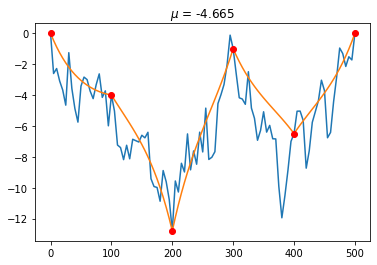

In [139]:
mu = np.random.normal(muChap,sigmaChapCarré)
while mu >= 0:
    mu = np.random.normal(muChap,sigmaChapCarré)
    
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)
while not(isNeg(simu)):
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    
allval6 = np.zeros(N)
allval6[unknown_indexes]=simu
allval6[observation_indexes]=depth
plt.plot(discretization,allval6)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.title("$\mu$ = " +str(round(mu,3)))
plt.show()


## __Question 9__

In [162]:
K = 20000
D = np.zeros(K)
for i in range(K):
    mu = np.random.normal(muChap,sigmaChapCarré)
    while mu >= 0:
        mu = np.random.normal(muChap,sigmaChapCarré)
    
    Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    while not(isNeg(simu)):
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
        
    allval7 = np.zeros(N)
    allval7[unknown_indexes]=simu
    allval7[observation_indexes]=depth
    D[i] = length(allval7,Delta) 
    
E = sum(D)/K
sig = np.sqrt(np.var(D))


Longueur moyenne : 
521.6736283427466

Interval de confiance : 
[516.48661136 527.58415597]

P(L) > 525 m :
0.18525

Histograme et convergence : 


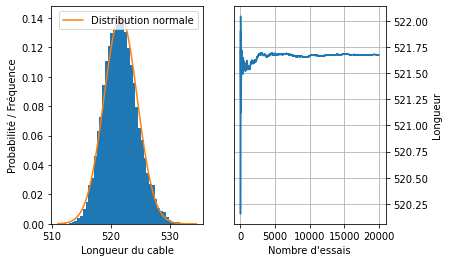

In [163]:
print("Longueur moyenne : ")
print(E)
print()
print("Interval de confiance : ")
print(np.quantile(D,[0.025,0.975]))
print()
print("P(L) > 525 m :")
print(np.mean(result>525))
print()
x = np.linspace(np.min(D),np.max(D),100)
y = (1/(np.sqrt(2*np.pi)*sig))*np.exp(-(x-E)**2/(2*sig**2))

fig = plt.figure()
gd = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gd[0,0])
ax2 = fig.add_subplot(gd[0,1])
print("Histograme et convergence : ")

ax1.hist(D,50,density=True)
ax1.plot(x,y, label = "Distribution normale")
ax1.set_xlabel("Longueur du cable")
ax1.set_ylabel("Probabilité / Fréquence")

ax1.legend()


ind = np.arange(K) + 1
ax2.plot(ind,np.cumsum(D)/ind)
ax2.yaxis.set_label_position('right')
ax2.yaxis.tick_right()
ax2.set_xlabel("Nombre d'essais")
ax2.set_ylabel("Longueur")
ax2.grid()
plt.show()

Les résultats sont donc sensiblement les mêmes que précédemment.

## __Question 10__

On a donc vu que faire suivre à $\mu$ une loi normale ne change pas beaucoup les résultats. On peut s'attendre à ce que changer $\sigma^2$ ne change pas grand chose, en revanche changer la valeur de $a$ aura une grande influence sur la longueur des câbles.